# Data Science Mini-Project

In this mini-project, I created a predictive model for identifying people to receive a pre-emptive e-mail to encourage them to pay online in the next five days.  <br>
In this notebook, I did all pre-processing and data visualization. Then divide the data to train and test. Finally, I normalized the train and test separately and save them for the next notebook to perform Machine Learning algorithms.  <br>
Input of this notebook: `DS_MiniProject_ANON-Copy1.csv` <br>
Outputs of this notebook: `X_train_normal.csv` , `X_test_normal.csv`, `y_train.csv`, `y_test.csv`

 
## Reading data and do the pre-processing and preparing data for classification algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
import umap
import imblearn
import category_encoders as ce
import seaborn as sns

## Reading data 
First, I start my work by taking a look at the data using `head` method.

In [2]:
data = pd.read_csv('DS_MiniProject_ANON-Copy1.csv')
data.head()

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,...,2,0,3,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,...,0,3,3,0,0,0,0,0,0,0
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,...,0,0,6,0,0,0,0,0,0,0
3,5/16/2014,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,5/20/2014,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


## Exploratory Data Analysis 
This is a step to underestand the dataset, including:<br>
1) Understanding variables<br>
2) Identifying the missing values<br> 
3) Extracting important variables and leaving useless variables <br>
4) Improve the insights of the dataset 

### 1) Understanding data
Extract the features and check the missing values in the dataset

In [3]:
# 1) Undrestaing data
features_list = data.columns.values
print('Features: \n', features_list)
print('data_shape:', data.shape)
print('Missing values:', data.isnull().sum())

Features: 
 ['DATE_FOR' 'RTD_ST_CD' 'CustomerSegment' 'Tenure' 'Age' 'MART_STATUS'
 'GENDER' 'CHANNEL1_6M' 'CHANNEL2_6M' 'CHANNEL3_6M' 'CHANNEL4_6M'
 'CHANNEL5_6M' 'METHOD1_6M' 'RECENT_PAYMENT' 'PAYMENTS_6M' 'CHANNEL1_3M'
 'CHANNEL2_3M' 'CHANNEL3_3M' 'CHANNEL4_3M' 'CHANNEL5_3M' 'METHOD1_3M'
 'PAYMENTS_3M' 'NOT_DI_3M' 'NOT_DI_6M' 'EVENT1_30_FLAG' 'EVENT2_90_SUM'
 'LOGINS' 'POLICYPURCHASECHANNEL' 'Call_Flag']
data_shape: (130086, 29)
Missing values: DATE_FOR                   0
RTD_ST_CD                  0
CustomerSegment            0
Tenure                     0
Age                        0
MART_STATUS                0
GENDER                     0
CHANNEL1_6M              809
CHANNEL2_6M              809
CHANNEL3_6M              809
CHANNEL4_6M              809
CHANNEL5_6M              809
METHOD1_6M               809
RECENT_PAYMENT           809
PAYMENTS_6M              809
CHANNEL1_3M                0
CHANNEL2_3M                0
CHANNEL3_3M                0
CHANNEL4_3M               

In [4]:
# Printing unique values of each feature
for fea in data:
    print(fea, ':',data[fea].unique().shape[0])

DATE_FOR : 8
RTD_ST_CD : 51
CustomerSegment : 4
Tenure : 10228
Age : 22347
MART_STATUS : 5
GENDER : 2
CHANNEL1_6M : 14
CHANNEL2_6M : 18
CHANNEL3_6M : 15
CHANNEL4_6M : 19
CHANNEL5_6M : 25
METHOD1_6M : 26
RECENT_PAYMENT : 3
PAYMENTS_6M : 30
CHANNEL1_3M : 7
CHANNEL2_3M : 11
CHANNEL3_3M : 9
CHANNEL4_3M : 10
CHANNEL5_3M : 16
METHOD1_3M : 16
PAYMENTS_3M : 20
NOT_DI_3M : 2
NOT_DI_6M : 2
EVENT1_30_FLAG : 1
EVENT2_90_SUM : 5
LOGINS : 45
POLICYPURCHASECHANNEL : 2
Call_Flag : 2


### 2) Cleaning the dataset
<b> - Drop the nan rows <br>
<b> - Drop the `DATE_FOR` column <br>
<b> - Drop the column with only one value


In [5]:
# Find the Shape of the data after cleaning Missing values of each feature
data.dropna(inplace=True)
print('clean_data_shape:', data.shape)
data.drop(['DATE_FOR'], axis=1, inplace=True)
data.describe()

clean_data_shape: (129277, 29)


,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
count,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,...,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.0,129277.000000,129277.000000,129277.000000,129277.000000
mean,8.591581,48.813929,0.261810,0.948467,0.811652,0.401216,0.569823,1.834425,0.105680,4.848333,...,0.285333,0.914494,2.427145,0.056019,0.080502,0.0,0.193522,0.953774,0.131284,0.036549
std,7.297798,14.037131,1.092346,1.880123,1.824188,1.065413,1.628655,2.596754,0.307429,2.027548,...,0.850155,1.388627,1.211655,0.229960,0.272069,0.0,0.509437,2.149006,0.337712,0.187654
min,0.032854,16.689938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.252567,37.845311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,7.006160,49.111567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,11.630390,58.830938,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,...,0.000000,2.000000,3.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
max,63.091034,99.348392,12.000000,53.000000,26.000000,18.000000,29.000000,53.000000,1.000000,53.000000,...,16.000000,36.000000,36.000000,1.000000,1.000000,0.0,4.000000,45.000000,1.000000,1.000000


It seems `EVENT1_30_FLAG` has only 1 value, and this value is zero! so we can remove it!

In [6]:
data = data.drop(data.columns[(data == 0).all()][0], axis=1)

### 3) Analyzing the relation between different features to avoid multicollinearity

In order to visualize data, we are going to use seaborn plots. Before the violin and swarm plot, we need to normalize/standardize data for ease of visualization (ranges are too different for original variables). 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

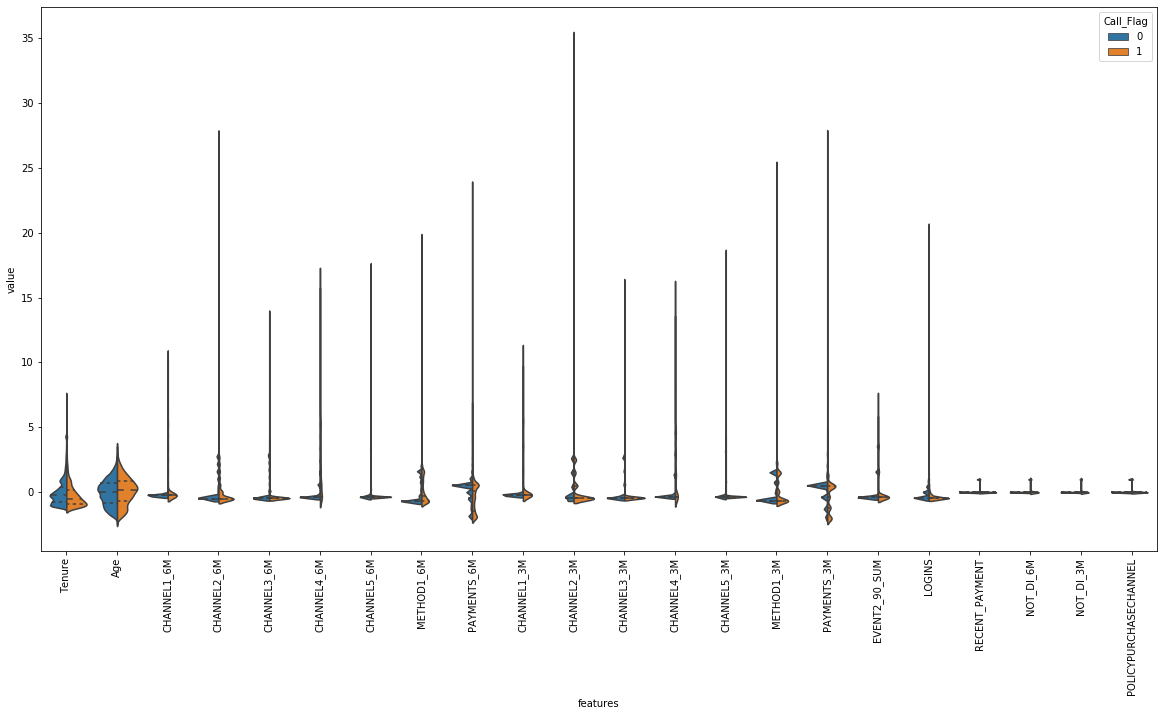

In [7]:
# Violin plot
numerical_data = data.select_dtypes(include=['float64','int64']).copy()
# Divide 0/1 features from rest features
binary_features = ['RECENT_PAYMENT','NOT_DI_6M','NOT_DI_3M','POLICYPURCHASECHANNEL']
x = numerical_data.drop("Call_Flag", axis=1)
y = numerical_data["Call_Flag"]

x_n_p = x.drop(binary_features, axis=1)
x_n_2 = (x_n_p - x_n_p.mean()) / (x_n_p.std()) # standardization
x = pd.concat([y,x_n_2,x[binary_features]],axis=1) 
x = pd.melt(x,id_vars="Call_Flag",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="Call_Flag", data=x, split=True, inner="quart")
plt.xticks(rotation=90)

Based on our observations, in `PAYMENT5_6M` feature, the median of the class sets looks to be well separated; hence, the feature can be good for classification. However, in the `Age` feature, the class's median does not look separated, so it does not give good information for classification.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

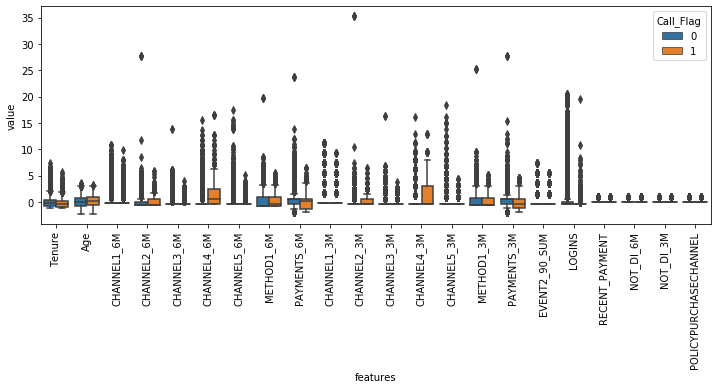

In [8]:
# As an alternative of violin plot, box plot can be used
plt.figure(figsize=(12,4))
sns.boxplot(x="features", y="value", hue="Call_Flag", data=x)
plt.xticks(rotation=90)

Based on the boxplot, we can interpret variables **METHOD1_6M** and **METHOD1_3M** look similar. As a result, we will investigate these two features deeper. We use the joint correlation plot as follows:

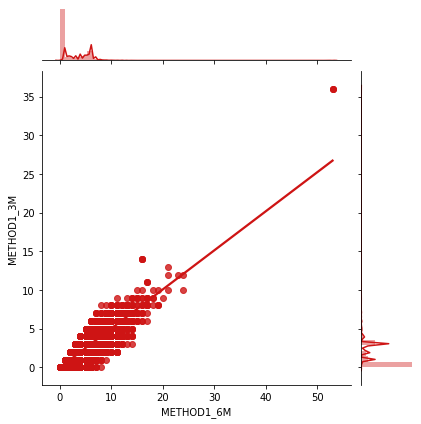

In [14]:
sns.jointplot(numerical_data.loc[:,'METHOD1_6M'], numerical_data.loc[:,'METHOD1_3M'], kind="regg", color="#ce1414")

In [ ]:
sns.set(style="whitegrid", palette="muted")
numerical_data = data.select_dtypes(include=['float64','int64']).copy()
x = numerical_data.drop("Call_Flag", axis=1)
y = numerical_data["Call_Flag"]

x_n_p = x.drop(binary_features, axis=1)
x_n_2 = (x_n_p - x_n_p.mean()) / (x_n_p.std()) # standardization
x = pd.concat([y,x_n_2,x[binary_features]],axis=1) 
x = pd.melt(x,id_vars="Call_Flag",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(18,10))
sns.swarmplot(x="features", y="value", hue="Call_Flag", data=x)
plt.xticks(rotation=90)

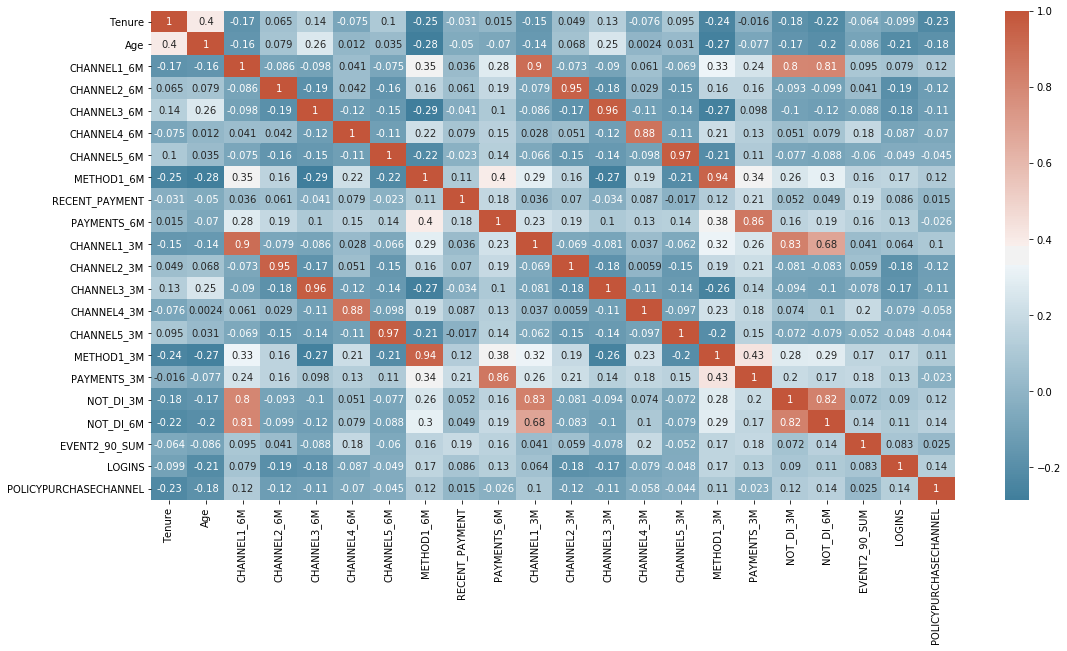

In [9]:
'''Correlation heatmap'''

# Compute the correlation matrix

corr = numerical_data.iloc[:,:-1].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
           cmap = cmap)

<b> Based on the correlation matrix, we can remove one of the columns with high correlation (>0.9)

In [10]:
data = data.drop(['CHANNEL1_6M','CHANNEL2_6M','CHANNEL3_6M','CHANNEL5_6M','METHOD1_3M'], axis=1)
data.shape

(129277, 22)

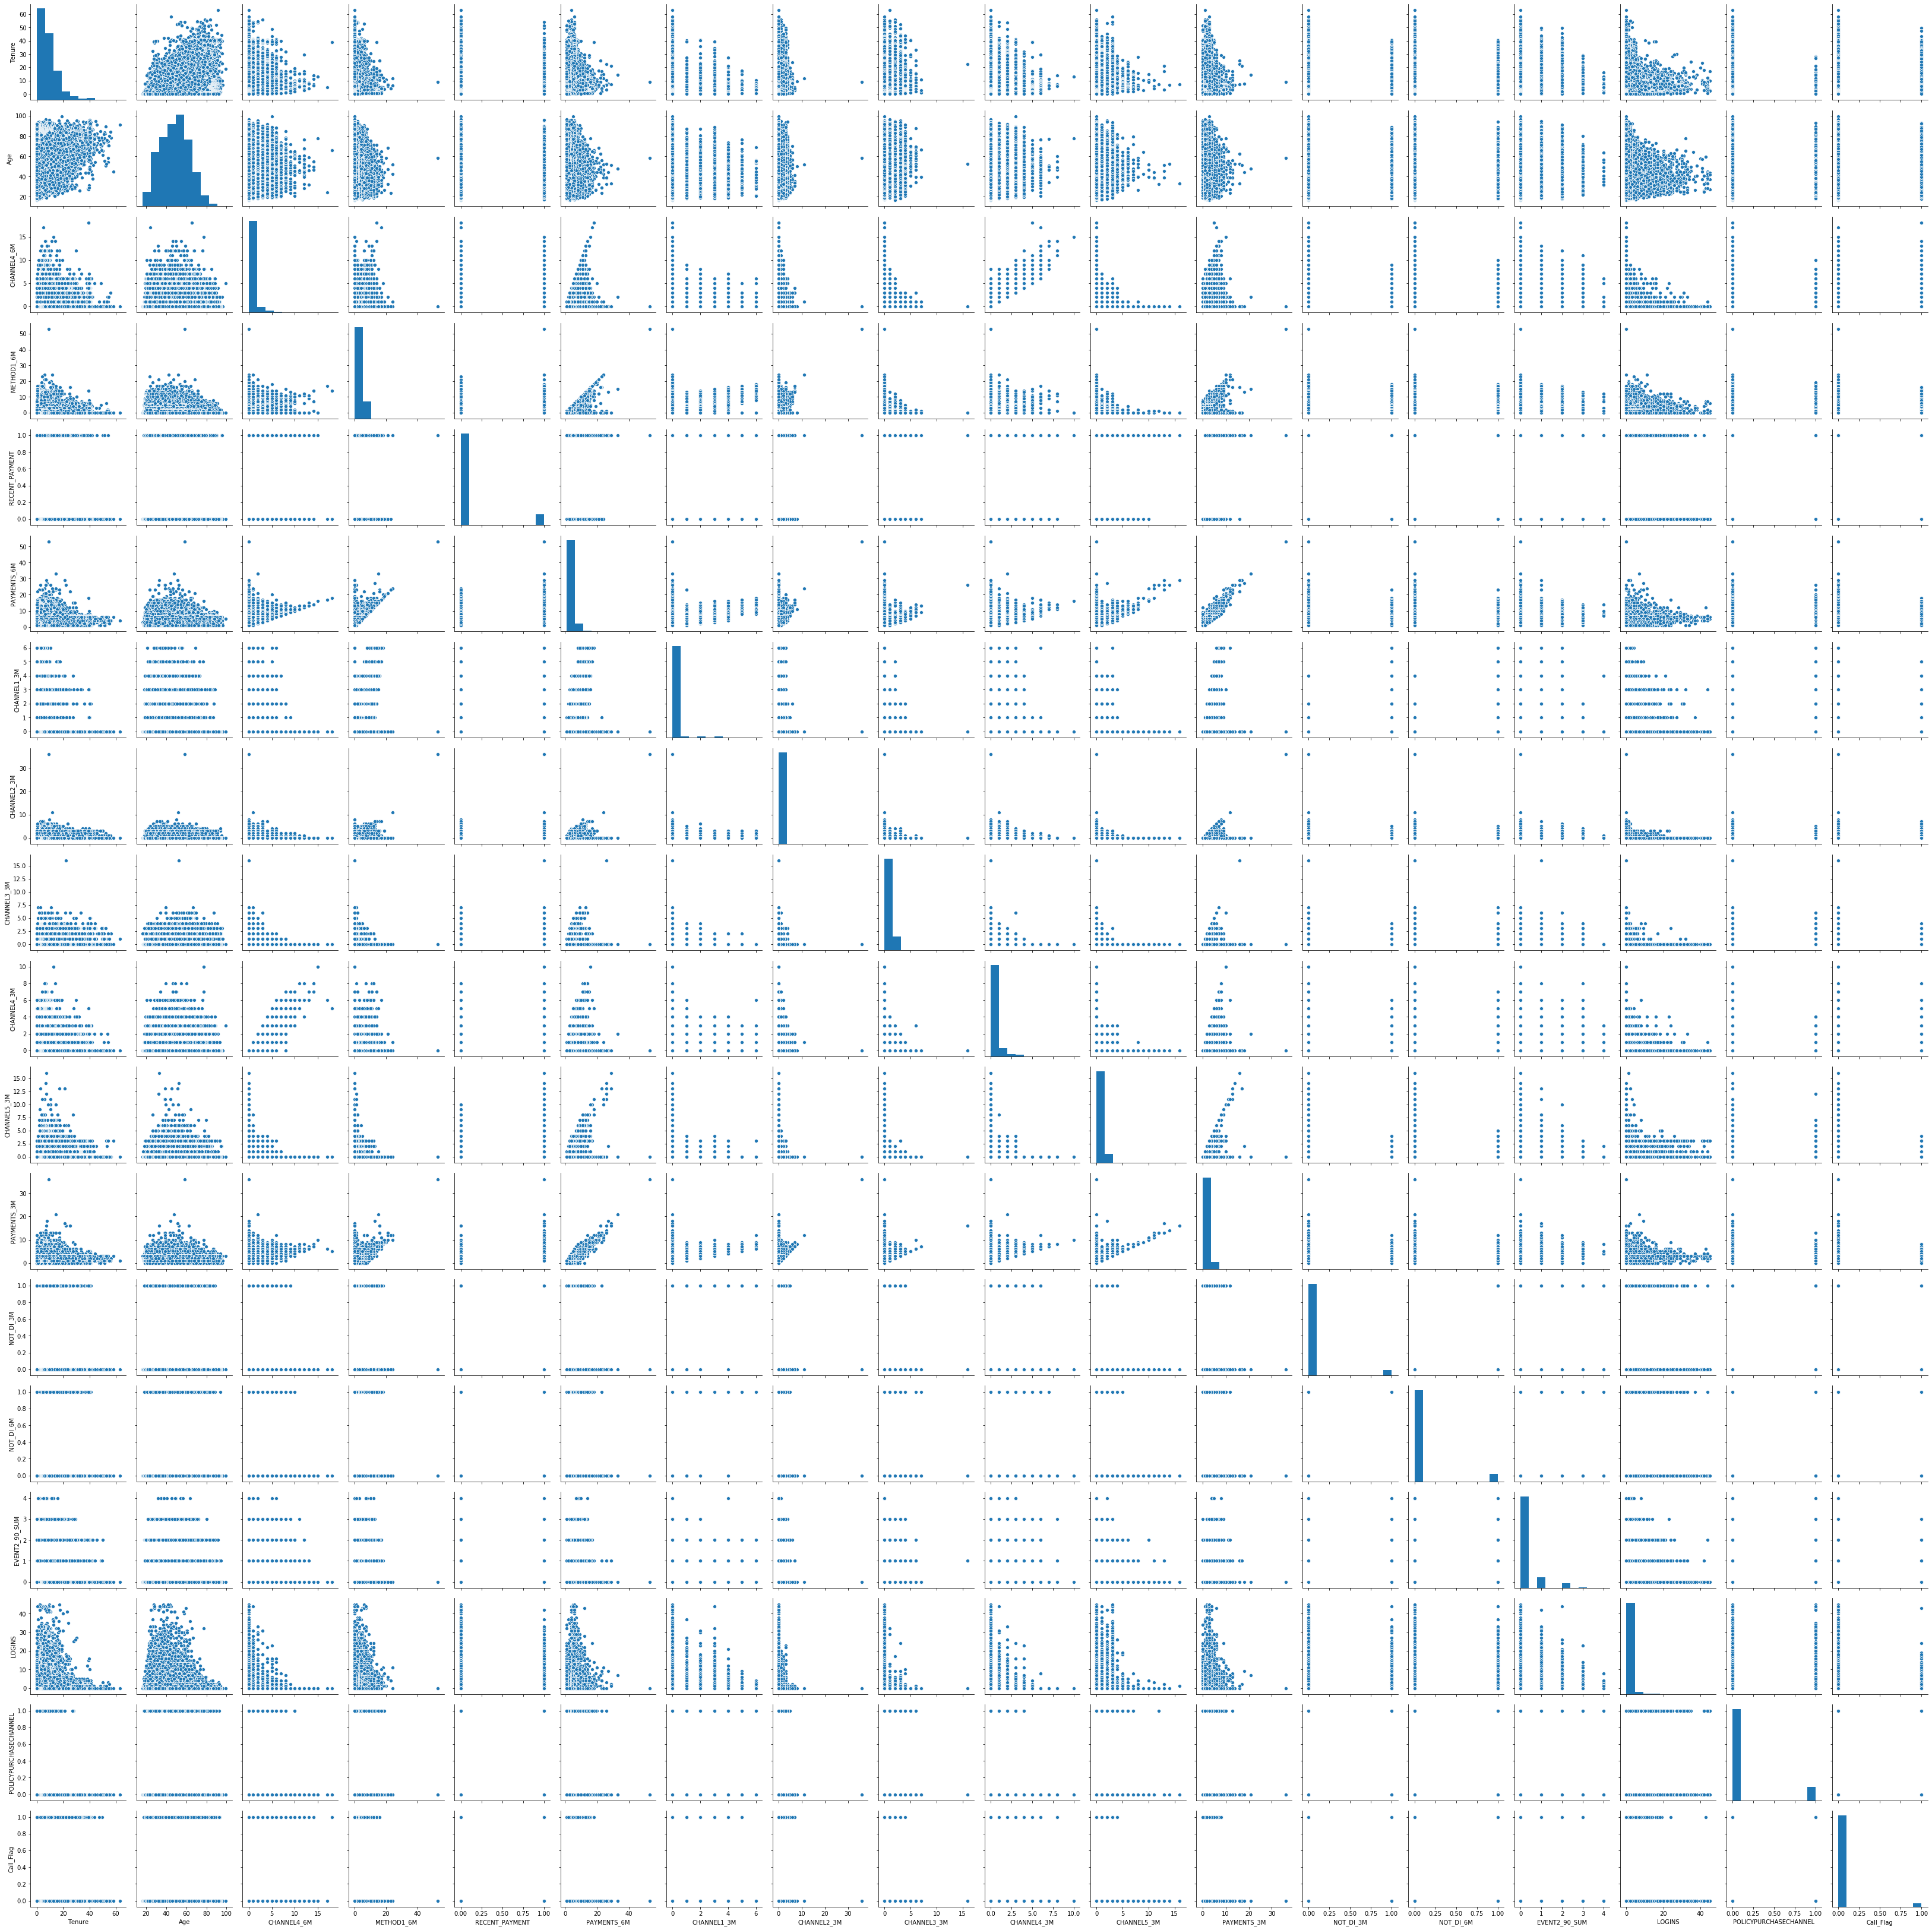

In [11]:
# scatterplot to show the relationship between all of varaibles:
sns.pairplot(data)

### 4) Insight of the dataset
#### Calculate the percentage of calls
Take a look at the distribution of the calls

length of dataset: 129277
All calls: 4725
Not_call: 124552
Percentage of Calls: 0.036549424878361964


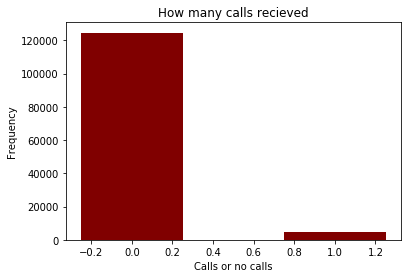

In [15]:
counts = data['Call_Flag'].value_counts()
calls = counts[1]
non_calls = counts[0]
print('length of dataset:', len(data))
print('All calls:',calls )
print('Not_call:',non_calls )
print('Percentage of Calls:', calls/(non_calls+calls))

fig = plt.figure(figsize = (6, 4))  
# creating the bar plot 
plt.bar([0,1], data['Call_Flag'].value_counts(), color ='maroon',  
        width = 0.5)   
plt.xlabel("Calls or no calls") 
plt.ylabel("Frequency") 
plt.title("How many calls recieved") 
plt.show()

#### Data Visualization, Histogram of some variables 
Visualization of the dataset 

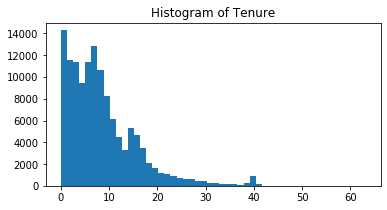

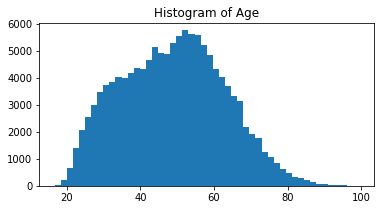

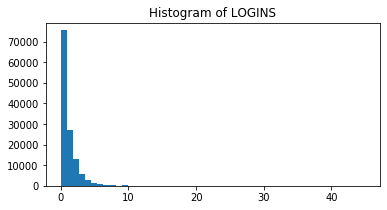

In [16]:
Hist_list = ['Tenure', 'Age','LOGINS' ]
n_bins = 50 

for column_name in Hist_list:
    ax=plt.subplots(figsize=(6,3))
    # get data by column_name and display a histogram
    ax = plt.hist(data[column_name], bins=n_bins)
    title="Histogram of " + column_name
    plt.title(title, fontsize=12)
    plt.show()

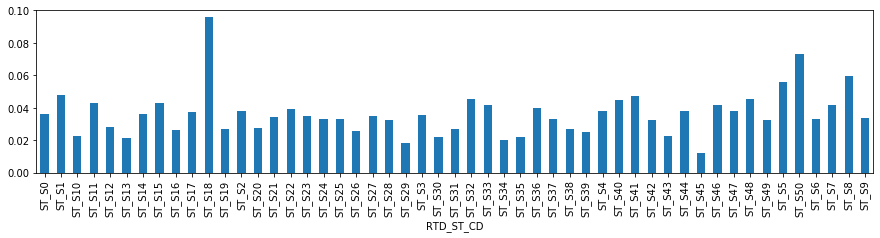

In [18]:
# A Barplot of the "RTD_ST_CD"
data.groupby("RTD_ST_CD")["Call_Flag"].mean().plot(kind="bar", figsize=(15,3))

## Encoding
Different encoding methods: <br> 
1) simple mapping <br>
2) Dummies encoding <br>
3) Hashing <br>

In [ ]:
# First we need to find the categorical features:
print(data.dtypes)
obj_data = data.select_dtypes(include=['object']).copy()
obj_data.head()

<b> Since the RTD_ST_CD has high cardinality we need to find another way to encode it because dummies and replace method are creating too many variables.

In [ ]:
# 1) FIND AND REPLACE:

keys = data.RTD_ST_CD.unique()
RTD_ST = pd.qcut(data.groupby("RTD_ST_CD")["Call_Flag"].mean(), 5,  labels=False)
dic_RTD = {keys[i]: RTD_ST[i] for i in range(0, len(RTD_ST))}

cleanup_nums = {"RTD_ST_CD": dic_RTD,
                "CustomerSegment": {"1": 1, "2": 2, "3": 3, "NONE": 0},
                "MART_STATUS": {"MS_S0": 0, "MS_S1": 1, "MS_S2": 2, "MS_S3": 3, "MS_S4": 4},
                "GENDER": {"F": 1, "M": 0}}

data_enc_one = data.copy()
obj_data.replace(cleanup_nums, inplace=True)
obj_data.head()
data_enc_one.replace(cleanup_nums, inplace=True)

In [19]:
# feature representation with imputing unknown variabl 

import category_encoders as ce

encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=['RTD_ST_CD','MART_STATUS', 'CustomerSegment','GENDER'])
encoder.fit(data, verbose=1)

enc_Back = encoder.transform(data)
enc_Back

,intercept,RTD_ST_CD_0,RTD_ST_CD_1,RTD_ST_CD_2,RTD_ST_CD_3,RTD_ST_CD_4,RTD_ST_CD_5,RTD_ST_CD_6,RTD_ST_CD_7,RTD_ST_CD_8,...,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,1,-0.980392,-0.960784,-0.941176,-0.921569,-0.901961,-0.882353,-0.862745,-0.843137,-0.823529,...,1,0,2,3,0,0,0,0,0,0
1,1,-0.980392,-0.960784,-0.941176,-0.921569,-0.901961,-0.882353,-0.862745,-0.843137,-0.823529,...,0,0,0,3,0,0,0,0,0,0
2,1,-0.980392,-0.960784,-0.941176,-0.921569,-0.901961,-0.882353,-0.862745,-0.843137,-0.823529,...,6,0,0,6,0,0,0,0,0,0
3,1,0.019608,-0.960784,-0.941176,-0.921569,-0.901961,-0.882353,-0.862745,-0.843137,-0.823529,...,0,0,0,0,0,0,0,0,1,0
4,1,-0.980392,-0.960784,-0.941176,-0.921569,-0.901961,-0.882353,-0.862745,-0.843137,-0.823529,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130081,1,0.019608,0.039216,0.058824,0.078431,0.098039,0.117647,0.137255,0.156863,0.176471,...,0,0,0,1,0,0,0,0,0,0
130082,1,0.019608,0.039216,0.058824,0.078431,0.098039,0.117647,0.137255,0.156863,0.176471,...,0,0,0,2,0,0,0,0,0,0
130083,1,0.019608,0.039216,0.058824,0.078431,0.098039,0.117647,0.137255,0.156863,0.176471,...,0,0,0,1,0,0,0,0,0,0
130084,1,0.019608,0.039216,0.058824,0.078431,0.098039,0.117647,0.137255,0.156863,0.176471,...,0,0,0,1,0,0,0,0,0,0


In [7]:
hash_enc = ce.HashingEncoder(cols=['RTD_ST_CD','MART_STATUS', 'CustomerSegment','GENDER'])
hash_enc.fit(data)
enc_data_hash = hash_enc.transform(data)


In [8]:
enc_data_hash

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Tenure,Age,...,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,0,0,1,2,0,0,0,1,16.175222,78.403833,...,0,2,0,3,0,0,0,0,0,0
1,0,0,1,2,0,0,0,1,15.931554,70.989733,...,0,0,3,3,0,0,0,0,0,0
2,0,0,0,2,1,0,0,1,15.937029,87.578371,...,0,0,0,6,0,0,0,0,0,0
3,0,0,0,3,1,0,0,0,15.934292,68.438056,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,2,0,0,0,1,15.501711,80.514716,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129272,0,1,0,2,1,0,0,0,0.131417,46.258727,...,0,0,0,1,0,0,0,0,0,0
129273,0,1,0,2,1,0,0,0,0.117728,36.574949,...,0,0,0,2,0,0,0,0,0,0
129274,0,1,1,1,1,0,0,0,0.131417,56.906229,...,0,0,0,1,0,0,0,0,0,0
129275,0,1,0,2,1,0,0,0,0.087611,23.857632,...,0,0,0,1,0,0,0,0,0,0


## Visualizing High-Dimensional Data using PCA, *t*-SNE & UMAP

Explained variation per principal component: [0.73046111 0.14786998 0.03563856 0.01850684]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 129277 samples in 1.265s...
[t-SNE] Computed neighbors for 129277 samples in 95.364s...
[t-SNE] Computed conditional probabilities for sample 1000 / 129277
[t-SNE] Computed conditional probabilities for sample 2000 / 129277
[t-SNE] Computed conditional probabilities for sample 3000 / 129277
[t-SNE] Computed conditional probabilities for sample 4000 / 129277
[t-SNE] Computed conditional probabilities for sample 5000 / 129277
[t-SNE] Computed conditional probabilities for sample 6000 / 129277
[t-SNE] Computed conditional probabilities for sample 7000 / 129277
[t-SNE] Computed conditional probabilities for sample 8000 / 129277
[t-SNE] Computed conditional probabilities for sample 9000 / 129277
[t-SNE] Computed conditional probabilities for sample 10000 / 129277
[t-SNE] Computed conditional probabilities for sample 11000 / 129277
[t-SNE] Comp

[t-SNE] Computed conditional probabilities for sample 123000 / 129277
[t-SNE] Computed conditional probabilities for sample 124000 / 129277
[t-SNE] Computed conditional probabilities for sample 125000 / 129277
[t-SNE] Computed conditional probabilities for sample 126000 / 129277
[t-SNE] Computed conditional probabilities for sample 127000 / 129277
[t-SNE] Computed conditional probabilities for sample 128000 / 129277
[t-SNE] Computed conditional probabilities for sample 129000 / 129277
[t-SNE] Computed conditional probabilities for sample 129277 / 129277
[t-SNE] Mean sigma: 1.240813
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.172997
[t-SNE] KL divergence after 300 iterations: 5.842719


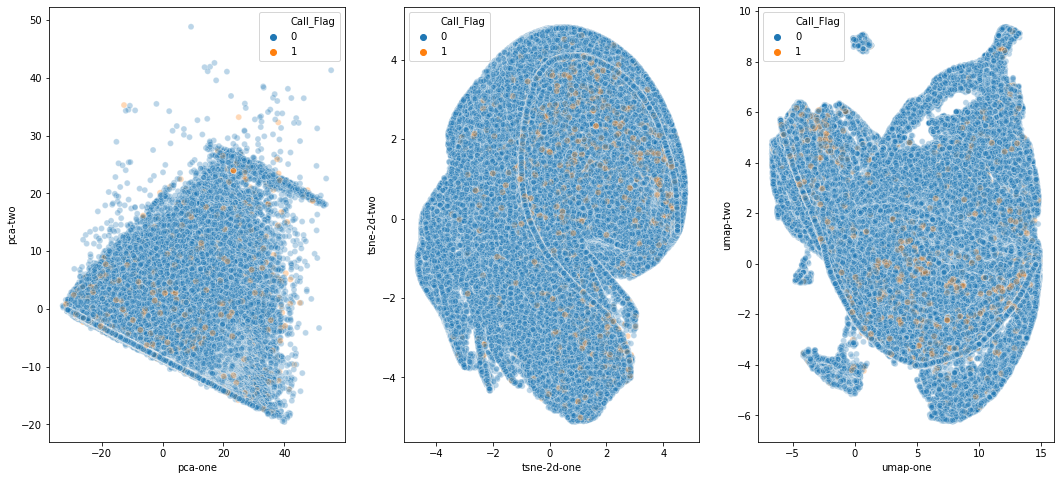

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

x = enc_data_hash.drop("Call_Flag", axis=1)
y = enc_data_hash["Call_Flag"]
df = enc_data_hash.loc[:,['Tenure','Age']]
x_data = enc_data_hash.drop(['Call_Flag'], axis=1)
# PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_data)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df['pca-one'] = pca_result[:,0]; df['pca-two'] = pca_result[:,1]

# UMAP 
# umap_results = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(x)
umap_results = umap.UMAP().fit_transform(x_data)
df['umap-one'] = umap_results[:,0]; df['umap-two'] = umap_results[:,1]

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_data)
df['tsne-2d-one'] = tsne_results[:,0]; df['tsne-2d-two'] = tsne_results[:,1]

# Plot Visualizations
plt.figure(figsize=(18,8))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x="pca-one", y="pca-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax1)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x="umap-one", y="umap-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax3)

## Dividing data to test and train

In [13]:
import sklearn
from sklearn.model_selection import train_test_split

x_all = enc_data_hash.drop("Call_Flag", axis=1)
y_all = data["Call_Flag"]
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all,test_size=0.2,random_state=10)


## Normalizing the data
### 1) Normalizing the training dataset <br>
First, I exclude the columns which have 0/1 values, `binary_features` and normalize rest of columns using `sklearn` package <br>
Then, I concatenated the normalized and 0/1 columns 

In [15]:
from sklearn import preprocessing

binary_features = ['col_0','col_1','col_2','col_5','col_6','col_7','RECENT_PAYMENT','NOT_DI_6M','NOT_DI_3M','POLICYPURCHASECHANNEL']

X_train_n = X_train.drop(binary_features, axis=1)
data_train_numpy = X_train_n.values
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data_train_numpy)
data_train_normal = pd.DataFrame(data_scaled)
data_train_normal = pd.concat([data_train_normal.reset_index(), X_train.loc[:,binary_features].reset_index()], axis=1)
data_train_normal = data_train_normal.drop(['index'],axis=1)
print('train data shape:', data_train_normal.shape)

train data shape: (103421, 30)


### Normalizing the test set

Follow the same process 

In [16]:
X_test_n = X_test.drop(binary_features, axis=1)
data_test_numpy = X_test_n.values
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data_test_numpy)
data_test_normal = pd.DataFrame(data_scaled)
data_test_normal = pd.concat([data_test_normal.reset_index(),X_test[binary_features].reset_index()], axis=1)
data_test_normal = data_test_normal.drop(['index'],axis=1)
print('test data shape:', data_test_normal.shape)


test data shape: (25856, 30)


In [ ]:
## Saving Data:
data_train_normal.to_csv('X_train_normal.csv',index=False)
data_test_normal.to_csv('X_test_normal.csv',index=False)

y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)